In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud = pd.read_csv("Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
fraud =  pd.get_dummies(fraud,columns=['Undergrad', 'Marital.Status', 'Urban'],drop_first=True)

In [14]:
fraud['TaxInc'] = pd.cut(fraud['Taxable.Income'], bins=[10002,30000,99620], labels=['Risky', 'Good'])
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [20]:
fraud = pd.get_dummies(fraud,columns=['TaxInc'],drop_first=True)

In [21]:
def norm(i):
  x = ( i - i.min() )/ ( i.max() - i.min() )
  return(x)

In [22]:
fraud_norm = norm( fraud.iloc[:,:] )
fraud_norm.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.656468,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.264428,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.300415,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.448436,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.792258,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [24]:
x = fraud.iloc[:,1:7]
y = fraud['TaxInc_Good']

In [25]:
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TaxInc_Good, Length: 600, dtype: uint8

In [34]:
#splitting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=35 )

In [35]:
x_train

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
61,86169,8,1,1,0,0
331,60999,15,1,1,0,1
455,65533,23,0,1,0,1
139,86904,20,1,0,0,0
247,108245,1,1,0,0,0
...,...,...,...,...,...,...
184,70138,15,0,0,0,1
249,35376,0,1,0,1,1
448,114597,28,1,0,1,1
33,157251,21,1,0,1,0


In [36]:
y_train

61     0
331    0
455    1
139    1
247    0
      ..
184    1
249    1
448    1
33     1
271    1
Name: TaxInc_Good, Length: 480, dtype: uint8

In [46]:
#decission tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
predict = model.predict(x_test)
pd.Series(predict).value_counts()

1    118
0      2
dtype: int64

In [41]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [42]:
pd.crosstab(y_test,predict)

col_0,0,1
TaxInc_Good,,
0,1,23
1,1,95


In [43]:
#Accuracy

np.mean(predict == y_test)

0.8

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,3) , dpi=400)
tree.plot_tree(model,
               filled = True)

#ginni impurities

In [51]:
#decission tree

model1 = DecisionTreeClassifier(criterion="gini", max_depth=3)
model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [52]:
predict = model1.predict(x_test)
pd.Series(predict).value_counts()

1    118
0      2
dtype: int64

In [53]:
pd.crosstab(y_test,predict)

col_0,0,1
TaxInc_Good,,
0,1,23
1,1,95


In [54]:
np.mean(predict == y_test)

0.8

[Text(0.5, 0.875, 'x[1] <= 23.5\ngini = 0.33\nsamples = 480\nvalue = [100, 380]'),
 Text(0.25, 0.625, 'x[1] <= 13.5\ngini = 0.351\nsamples = 361\nvalue = [82, 279]'),
 Text(0.125, 0.375, 'x[0] <= 193594.0\ngini = 0.313\nsamples = 221\nvalue = [43, 178]'),
 Text(0.0625, 0.125, 'gini = 0.298\nsamples = 214\nvalue = [39, 175]'),
 Text(0.1875, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.375, 0.375, 'x[0] <= 176304.0\ngini = 0.402\nsamples = 140\nvalue = [39, 101]'),
 Text(0.3125, 0.125, 'gini = 0.433\nsamples = 120\nvalue = [38, 82]'),
 Text(0.4375, 0.125, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.75, 0.625, 'x[3] <= 0.5\ngini = 0.257\nsamples = 119\nvalue = [18, 101]'),
 Text(0.625, 0.375, 'x[1] <= 29.5\ngini = 0.182\nsamples = 79\nvalue = [8, 71]'),
 Text(0.5625, 0.125, 'gini = 0.109\nsamples = 69\nvalue = [4, 65]'),
 Text(0.6875, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.875, 0.375, 'x[1] <= 28.5\ngini = 0.375\nsamples = 40\nvalue = [10, 

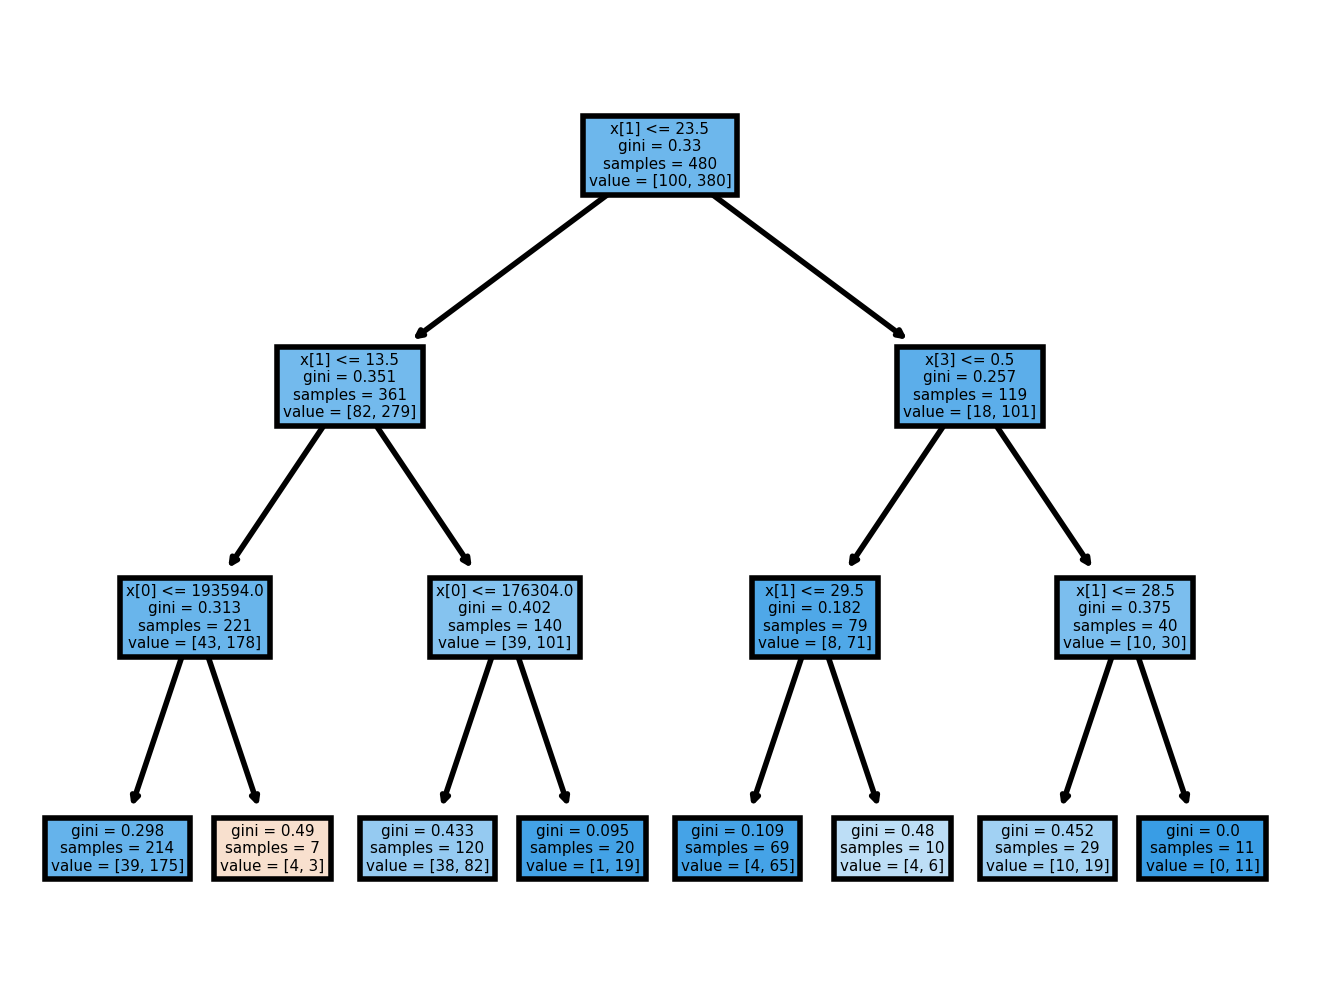

In [55]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,3) , dpi=400)
tree.plot_tree(model1,
               filled = True)